In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

In [3]:
# import csv file
path = 'dataset/randomforest/'
df_train = pd.read_csv(path + 'ml-100k-preprocessed-train.csv')

In [4]:
# list of column names
feature_names = list(df_train.columns)
feature_names.remove('rating')

In [5]:
# feature importance

In [6]:
# initialize and fit the model
forest = RandomForestClassifier(random_state=0)
forest.fit(df_train.drop((['rating']), axis = 1), df_train['rating'])

RandomForestClassifier(random_state=0)

In [9]:
# extract the feature importance values
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

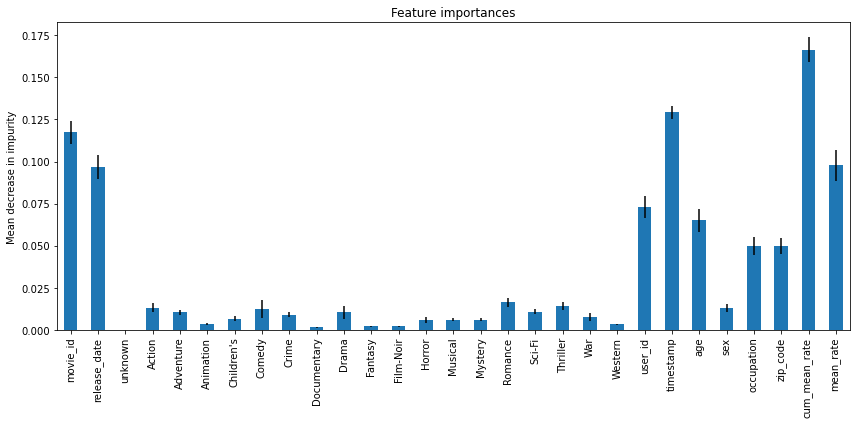

In [10]:
# visualize the importance of each feature
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(12,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()